## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,resting blood pressure, serum cholesterol, and maximum heart rate achieved.Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Observation
No missing Values present and No categorical variable

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [4]:
## Independent and Dependent variables
X = df.iloc[:,:-1]
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [8]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=10)

In [9]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [10]:
y_pred = RFC.predict(X_test)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [12]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8351648351648352
[[33  8]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [13]:
conf_mat = confusion_matrix(y_test,y_pred)

In [14]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [15]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8351648351648352

In [16]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8048780487804879

In [17]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.825

In [18]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8148148148148149

## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

<AxesSubplot: >

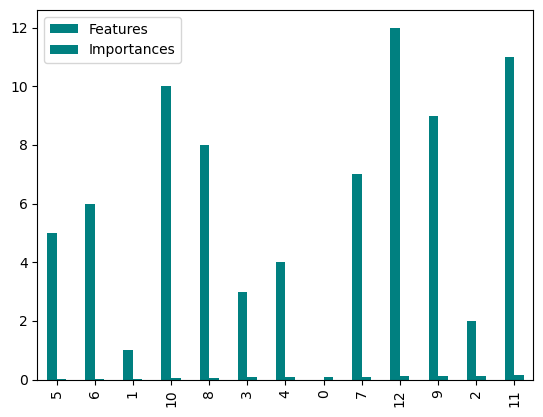

In [19]:
# get the importance of the resulting features
importances = RFC.feature_importances_

#create data frame for visualization
final_df = pd.DataFrame({"Features":pd.DataFrame(X_train).columns,"Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization
final_df = final_df.sort_values('Importances')

# plot the feature importance in bars
final_df.plot.bar(color='teal')

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
classifier = RandomForestClassifier()

In [22]:
parameters = {'n_estimators':[100,200],
             'max_depth':[3,4,5],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[3,4]}

In [23]:
cv = GridSearchCV(classifier,param_grid=parameters,cv=5,verbose=3,scoring='accuracy')

In [25]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.3s
[C

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=3)

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [26]:
cv.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

## Best parameters-
- max_depth = 4
- min_samples_leaf = 3
- min_samples_split = 3
- n_estimators = 100

In [27]:
y_pred_cv=cv.predict(X_test)

In [28]:
print(accuracy_score(y_test,y_pred_cv))
print(classification_report(y_test,y_pred_cv))
print(confusion_matrix(y_test,y_pred_cv))

0.8351648351648352
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

[[32  9]
 [ 6 44]]


Accuracy of the model created by hyperparameter tuning is more than that of model created without Hyperparameter tuning

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [29]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1)
            ,make_blobs()
           ]

In [30]:
pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 65.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: >

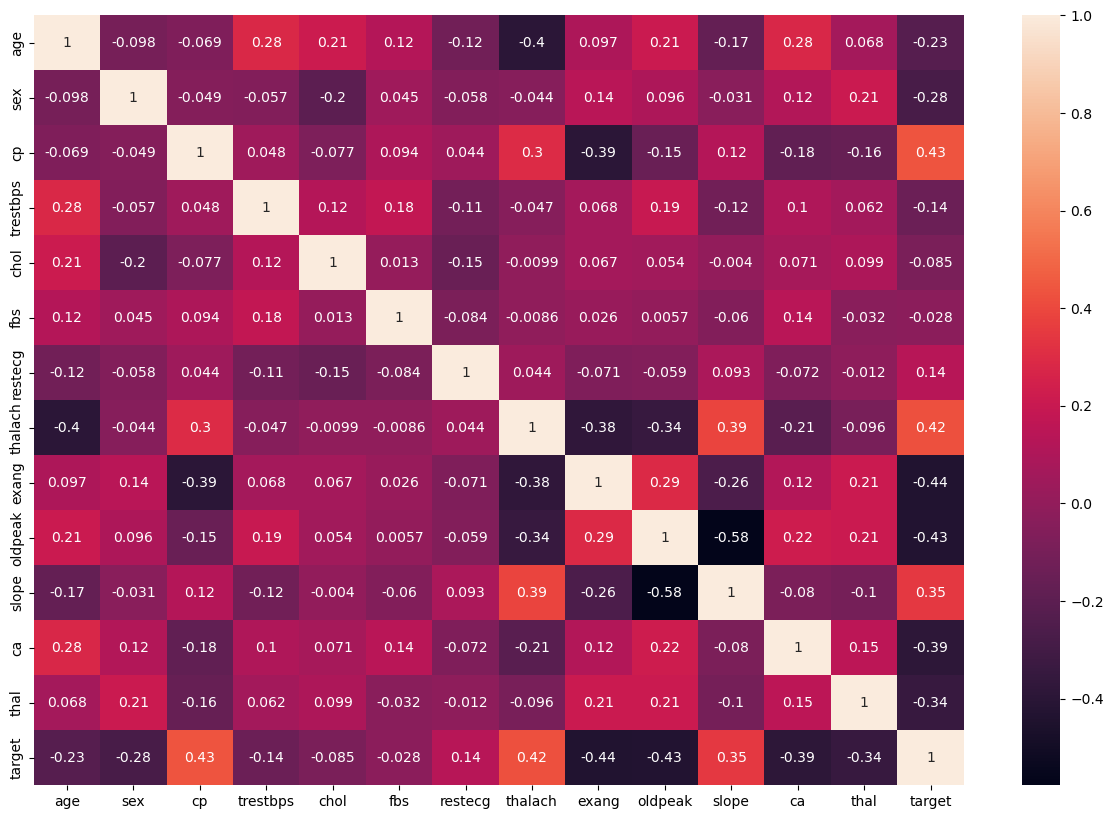

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

## Observation
Two of the most important founded from the heatmap are cp and thalach

In [35]:
from sklearn.inspection import DecisionBoundaryDisplay

In [38]:
cols = df[['cp','thalach']]

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


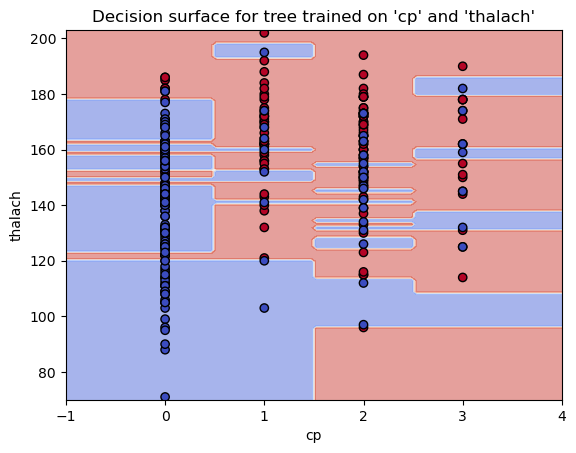

In [42]:
classifier = RandomForestClassifier().fit(cols,df['target'])
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              cols, 
                                              response_method="predict",
                                              xlabel='cp', ylabel='thalach',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

disp.ax_.scatter(df['cp'], df['thalach'], 
                 c=df['target'], edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title("Decision surface for tree trained on 'cp' and 'thalach'")
plt.show()